In [5]:
# --- Section 1: Project Setup & Data Acquisition ---
# Objective: Prepare the environment and load the primary dataset for sentiment analysis.

print("Initiating Step 1: Project Setup & Data Acquisition...")

# --- 1.1 Import Essential Libraries ---
# Libraries are foundational tools for any data science project. We import them upfront.

import pandas as pd      # Core library for data manipulation and analysis, especially with DataFrames.
import numpy as np       # Fundamental package for numerical operations, critical for data transformations.
import matplotlib.pyplot as plt # Standard library for creating static, interactive, and animated visualizations.
import seaborn as sns    # Built on Matplotlib, provides a high-level interface for aesthetically pleasing statistical graphics.

# NLTK (Natural Language Toolkit) and its related modules for text processing.
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Specifically for VADER sentiment analysis, robust for social media text.
from textblob import TextBlob                             # A simple API for common NLP tasks, including sentiment and subjectivity.
from nltk.corpus import stopwords                         # Contains a list of common words (e.g., 'the', 'is') to be filtered out.
from nltk.tokenize import word_tokenize                   # Function to split text into individual words (tokens).
from nltk.stem import WordNetLemmatizer                   # Tool to reduce words to their base or root form (e.g., 'running' -> 'run').
import re                                                 # Regular expression operations for pattern matching in text.

print("All necessary libraries imported successfully.")


# --- 1.2 Download NLTK Data Resources ---
# NLTK relies on various linguistic datasets (corpora, lexicons) that need to be downloaded once.
# We use try-except blocks to download resources if they are not found, making the notebook robust.

print("\nDownloading NLTK data resources (this might take a moment on first run)...")

# Download VADER lexicon for sentiment analysis
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
    print("vader_lexicon already present.")
except LookupError:
    print("vader_lexicon not found, downloading now...")
    nltk.download('vader_lexicon') # Removed quiet=True to show progress
    print("vader_lexicon downloaded.")

# Download Punkt tokenizer for word tokenization
try:
    nltk.data.find('tokenizers/punkt.zip')
    print("punkt already present.")
except LookupError:
    print("punkt not found, downloading now...")
    nltk.download('punkt') # Removed quiet=True to show progress
    print("punkt downloaded.")

# Download Stopwords for common word removal
try:
    nltk.data.find('corpora/stopwords.zip')
    print("stopwords already present.")
except LookupError:
    print("stopwords not found, downloading now...")
    nltk.download('stopwords') # Removed quiet=True to show progress
    print("stopwords downloaded.")

# Download WordNet for lemmatization
try:
    nltk.data.find('corpora/wordnet.zip')
    print("wordnet already present.")
except LookupError:
    print("wordnet not found, downloading now...")
    nltk.download('wordnet') # Removed quiet=True to show progress
    print("wordnet downloaded.")

# Download Open Multilingual Wordnet (often a dependency for 'wordnet')
try:
    nltk.data.find('corpora/omw-1.4.zip')
    print("omw-1.4 already present.")
except LookupError:
    print("omw-1.4 not found, downloading now...")
    nltk.download('omw-1.4') # Removed quiet=True to show progress
    print("omw-1.4 downloaded.")

print("All NLTK data downloads complete (or already present).")


# --- 1.3 Load the E-commerce Review Dataset ---
# We'll load the dataset you confirmed: 'Dataset-SA.csv'.
# This file contains the raw review data and will be loaded into a Pandas DataFrame.

# Define the exact filename of your dataset. IMPORTANT: Ensure this matches the file you uploaded to Colab.
dataset_filename = 'Dataset-SA.csv' # <--- This is the correct filename based on your confirmation

print(f"\nAttempting to load dataset from: '{dataset_filename}'")
try:
    # pd.read_csv is used to load data from a CSV file into a DataFrame.
    # The 'encoding' parameter can sometimes be necessary for text data to handle special characters.
    # We'll try 'utf-8' as a common encoding.
    df = pd.read_csv(dataset_filename, encoding='utf-8')
    print(f"Dataset '{dataset_filename}' loaded successfully!")
    print(f"Total number of records (reviews): {len(df)}")

    # Display the first few rows to get an immediate sense of the data's structure and content.
    print("\n--- First 5 Rows of the Loaded Dataset ---")
    print(df.head())

    # Display concise summary of the DataFrame, showing column names, non-null counts, and data types.
    # This helps confirm data integrity and readiness for analysis.
    print("\n--- DataFrame Information Summary ---")
    df.info()

except FileNotFoundError:
    print(f"\nERROR: The file '{dataset_filename}' was not found in your Colab environment.")
    print("Please ensure the CSV file is uploaded to your Google Colab session and the filename is correct.")
    print("To upload: On the left sidebar, click the 'Files' icon (folder), then the 'Upload' icon (up arrow), and select your file.")
except Exception as e:
    print(f"\nAn unexpected error occurred while loading the dataset: {e}")
    print("Please check the file's integrity or encoding if the issue persists.")

print("\n--- Step 1: Project Setup & Data Acquisition Complete! ---")

Initiating Step 1: Project Setup & Data Acquisition...
All necessary libraries imported successfully.

vader_lexicon not found, downloading now...


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...


vader_lexicon downloaded.
punkt not found, downloading now...


[nltk_data]   Unzipping tokenizers/punkt.zip.


punkt downloaded.
stopwords not found, downloading now...
stopwords downloaded.
wordnet not found, downloading now...
wordnet downloaded.
omw-1.4 not found, downloading now...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


omw-1.4 downloaded.
All NLTK data downloads complete (or already present).

Attempting to load dataset from: 'Dataset-SA.csv'
Dataset 'Dataset-SA.csv' loaded successfully!
Total number of records (reviews): 205052

--- First 5 Rows of the Loaded Dataset ---
                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   

Initiating Step 2: Exploratory Data Analysis (EDA)...

--- 2.1 Data Integrity Check ---
Counting missing values per column:
product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

Missing values in 'Review' column after handling: 0
Ensured 'Review' column is of string type.

DataFrame Information (after initial integrity checks):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         205052 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB

'Rate' column converted to numeric (integer) type.
Rows with invalid 

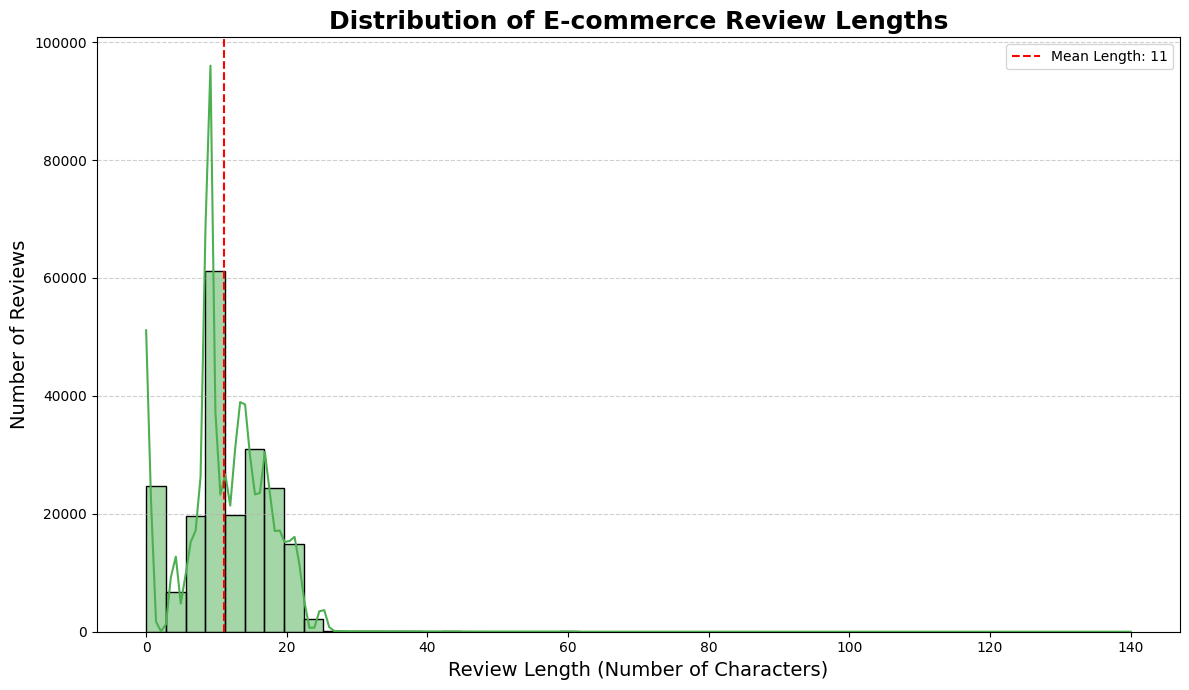

Descriptive statistics for review lengths:
count    205049.000000
mean         11.101186
std           6.220492
min           0.000000
25%           9.000000
50%          11.000000
75%          15.000000
max         140.000000
Name: review_length, dtype: float64

--- 2.3 Analyzing Product Rating Distribution (Rate Column) ---
Value counts for 'Rate' column (normalized):
Rate
1    0.103878
2    0.031656
3    0.080951
4    0.204312
5    0.579203
Name: proportion, dtype: float64


<ipython-input-6-a7c01d1ee147>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rating_column_name, data=df, palette='coolwarm') # Using a diverging color palette for ratings


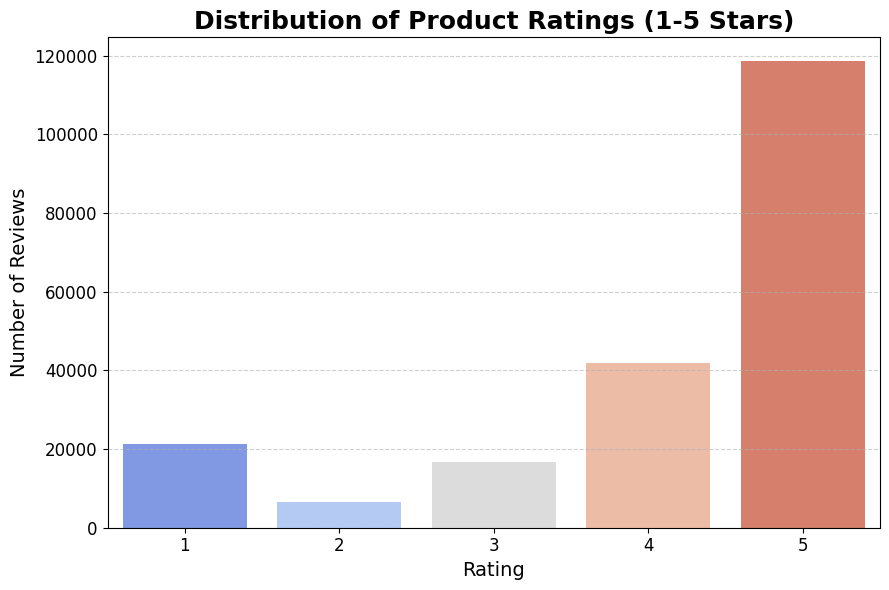


--- Step 2: Exploratory Data Analysis (EDA) Complete! ---
Key insights gathered on data quality, review lengths, and rating patterns.


In [6]:
# --- Section 2: Exploratory Data Analysis (EDA) ---
# Objective: Understand the structure, quality, and initial characteristics of the raw review data.

print("Initiating Step 2: Exploratory Data Analysis (EDA)...")

# --- 2.1 Data Integrity Check: Missing Values and Data Types ---
# A crucial first step is to identify any missing values and ensure columns have appropriate data types.
# Missing review text can lead to errors in NLP processing.

print("\n--- 2.1 Data Integrity Check ---")
print("Counting missing values per column:")
print(df.isnull().sum())

# Define the primary review text column name based on your dataset
review_column_name = 'Review' # This matches your 'Dataset-SA.csv'

if review_column_name in df.columns:
    # Fill any NaN values in the review column with an empty string to prevent NLP errors.
    # Converting to string explicitly ensures robustness for all entries.
    df[review_column_name] = df[review_column_name].fillna('').astype(str)
    print(f"\nMissing values in '{review_column_name}' column after handling: {df[review_column_name].isnull().sum()}")
    print(f"Ensured '{review_column_name}' column is of string type.")
else:
    print(f"\nWARNING: Column '{review_column_name}' not found. Please verify the correct review text column name in your DataFrame.")
    print("Skipping specific NaN handling for review text as column is missing.")

# Display updated DataFrame information, especially useful after data type adjustments.
# Note: The 'Rate' column is currently 'object' type. We'll explicitly convert it to numeric for analysis.
print("\nDataFrame Information (after initial integrity checks):")
df.info()

# Convert 'Rate' column to numeric, coercing errors to NaN.
# Then fill any new NaNs (from coercion) with a sensible value like 0 or drop them, depending on context.
# For ratings, dropping them might be safer if they're genuinely invalid, or filling with a neutral value.
# For this project, we'll convert and then drop if a rate becomes NaN, assuming invalid entries.
rating_column_name = 'Rate' # This matches your 'Dataset-SA.csv'

if rating_column_name in df.columns:
    # Use pd.to_numeric with errors='coerce' to turn non-numeric entries into NaN.
    df[rating_column_name] = pd.to_numeric(df[rating_column_name], errors='coerce')
    # Drop rows where 'Rate' became NaN after coercion, as these are invalid ratings.
    df.dropna(subset=[rating_column_name], inplace=True)
    # Convert to integer type, as ratings are typically whole numbers.
    df[rating_column_name] = df[rating_column_name].astype(int)
    print(f"\n'{rating_column_name}' column converted to numeric (integer) type.")
    print(f"Rows with invalid '{rating_column_name}' values (coerced to NaN) have been dropped.")
else:
    print(f"\nWARNING: Column '{rating_column_name}' not found. Skipping numeric conversion.")


# --- 2.2 Review Length Analysis ---
# Understanding the distribution of review lengths can inform preprocessing strategies (e.g., if many are very short/long).

print("\n--- 2.2 Analyzing Review Lengths ---")
# Calculate the length of each review (number of characters) and store in a new column.
df['review_length'] = df[review_column_name].apply(len)

# Visualize the distribution of review lengths using a histogram.
# A KDE (Kernel Density Estimate) curve is added to show the overall shape of the distribution.
plt.figure(figsize=(12, 7))
sns.histplot(df['review_length'], bins=50, kde=True, color='#4CAF50', edgecolor='black') # Using a professional color palette
plt.title('Distribution of E-commerce Review Lengths', fontsize=18, fontweight='bold')
plt.xlabel('Review Length (Number of Characters)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6) # Subtle grid for better readability
plt.axvline(df['review_length'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean Length: {df["review_length"].mean():.0f}')
plt.legend()
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

print(f"Descriptive statistics for review lengths:\n{df['review_length'].describe()}")


# --- 2.3 Product Rating Distribution ---
# Analyzing the distribution of star ratings provides an initial gauge of overall customer satisfaction.
# This section will now use the correctly converted numeric 'Rate' column.

if rating_column_name in df.columns:
    print(f"\n--- 2.3 Analyzing Product Rating Distribution ({rating_column_name} Column) ---")
    print(f"Value counts for '{rating_column_name}' column (normalized):\n{df[rating_column_name].value_counts(normalize=True).sort_index()}")

    # Visualize the distribution of ratings.
    # A countplot is suitable for categorical or ordinal data like star ratings.
    plt.figure(figsize=(9, 6))
    sns.countplot(x=rating_column_name, data=df, palette='coolwarm') # Using a diverging color palette for ratings
    plt.title('Distribution of Product Ratings (1-5 Stars)', fontsize=18, fontweight='bold')
    plt.xlabel('Rating', fontsize=14)
    plt.ylabel('Number of Reviews', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print(f"\nWARNING: Column '{rating_column_name}' is not available or not numeric. Skipping Rating Distribution analysis.")

print("\n--- Step 2: Exploratory Data Analysis (EDA) Complete! ---")
print("Key insights gathered on data quality, review lengths, and rating patterns.")

In [8]:
# --- Section 1: Project Setup & Data Acquisition ---
# Objective: Prepare the environment and load the primary dataset for sentiment analysis.

print("Initiating Step 1: Project Setup & Data Acquisition...")

# --- 1.1 Import Essential Libraries ---
# Libraries are foundational tools for any data science project. We import them upfront.

import pandas as pd      # Core library for data manipulation and analysis, especially with DataFrames.
import numpy as np       # Fundamental package for numerical operations, critical for data transformations.
import matplotlib.pyplot as plt # Standard library for creating static, interactive, and animated visualizations.
import seaborn as sns    # Built on Matplotlib, provides a high-level interface for aesthetically pleasing statistical graphics.

# NLTK (Natural Language Toolkit) and its related modules for text processing.
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Specifically for VADER sentiment analysis, robust for social media text.
from textblob import TextBlob                             # A simple API for common NLP tasks, including sentiment and subjectivity.
from nltk.corpus import stopwords                         # Contains a list of common words (e.g., 'the', 'is') to be filtered out.
from nltk.tokenize import word_tokenize                   # Function to split text into individual words (tokens).
from nltk.stem import WordNetLemmatizer                   # Tool to reduce words to their base or root form (e.g., 'running' -> 'run').
import re                                                 # Regular expression operations for pattern matching in text.

print("All necessary libraries imported successfully.")


# --- 1.2 Download NLTK Data Resources ---
# NLTK relies on various linguistic datasets (corpora, lexicons) that need to be downloaded once.
# We use try-except blocks to download resources if they are not found, making the notebook robust.

print("\nDownloading NLTK data resources (this might take a moment on first run)...")

# Download VADER lexicon for sentiment analysis
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
    print("vader_lexicon already present.")
except LookupError:
    print("vader_lexicon not found, downloading now...")
    nltk.download('vader_lexicon')
    print("vader_lexicon downloaded.")

# Download Punkt tokenizer for word tokenization
try:
    nltk.data.find('tokenizers/punkt.zip')
    print("punkt already present.")
except LookupError:
    print("punkt not found, downloading now...")
    nltk.download('punkt')
    print("punkt downloaded.")

# **NEW ADDITION: Explicitly download punkt_tab for robust tokenization**
try:
    nltk.data.find('tokenizers/punkt_tab.zip') # Check for punkt_tab directly
    print("punkt_tab already present.")
except LookupError:
    print("punkt_tab not found, downloading now...")
    nltk.download('punkt_tab') # Download punkt_tab explicitly
    print("punkt_tab downloaded.")


# Download Stopwords for common word removal
try:
    nltk.data.find('corpora/stopwords.zip')
    print("stopwords already present.")
except LookupError:
    print("stopwords not found, downloading now...")
    nltk.download('stopwords')
    print("stopwords downloaded.")

# Download WordNet for lemmatization
try:
    nltk.data.find('corpora/wordnet.zip')
    print("wordnet already present.")
except LookupError:
    print("wordnet not found, downloading now...")
    nltk.download('wordnet')
    print("wordnet downloaded.")

# Download Open Multilingual Wordnet (often a dependency for 'wordnet')
try:
    nltk.data.find('corpora/omw-1.4.zip')
    print("omw-1.4 already present.")
except LookupError:
    print("omw-1.4 not found, downloading now...")
    nltk.download('omw-1.4')
    print("omw-1.4 downloaded.")

print("All NLTK data downloads complete (or already present).")


# --- 1.3 Load the E-commerce Review Dataset ---
# We'll load the dataset you confirmed: 'Dataset-SA.csv'.
# This file contains the raw review data and will be loaded into a Pandas DataFrame.

# Define the exact filename of your dataset. IMPORTANT: Ensure this matches the file you uploaded to Colab.
dataset_filename = 'Dataset-SA.csv' # This is the correct filename based on your confirmation

print(f"\nAttempting to load dataset from: '{dataset_filename}'")
try:
    # pd.read_csv is used to load data from a CSV file into a DataFrame.
    # The 'encoding' parameter can sometimes be necessary for text data to handle special characters.
    # We'll try 'utf-8' as a common encoding.
    df = pd.read_csv(dataset_filename, encoding='utf-8')
    print(f"Dataset '{dataset_filename}' loaded successfully!")
    print(f"Total number of records (reviews): {len(df)}")

    # Display the first few rows to get an immediate sense of the data's structure and content.
    print("\n--- First 5 Rows of the Loaded Dataset ---")
    print(df.head())

    # Display concise summary of the DataFrame, showing column names, non-null counts, and data types.
    # This helps confirm data integrity and readiness for analysis.
    print("\n--- DataFrame Information Summary ---")
    df.info()

except FileNotFoundError:
    print(f"\nERROR: The file '{dataset_filename}' was not found in your Colab environment.")
    print("Please ensure the CSV file is uploaded to your Google Colab session and the filename is correct.")
    print("To upload: On the left sidebar, click the 'Files' icon (folder), then the 'Upload' icon (up arrow), and select your file.")
except Exception as e:
    print(f"\nAn unexpected error occurred while loading the dataset: {e}")
    print("Please check the file's integrity or encoding if the issue persists.")

print("\n--- Step 1: Project Setup & Data Acquisition Complete! ---")

Initiating Step 1: Project Setup & Data Acquisition...
All necessary libraries imported successfully.

vader_lexicon already present.
punkt already present.
punkt_tab not found, downloading now...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


punkt_tab downloaded.
stopwords already present.
wordnet already present.
omw-1.4 already present.
All NLTK data downloads complete (or already present).

Attempting to load dataset from: 'Dataset-SA.csv'
Dataset 'Dataset-SA.csv' loaded successfully!
Total number of records (reviews): 205052

--- First 5 Rows of the Loaded Dataset ---
                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cool

In [9]:
# --- Section 3: Text Preprocessing (NLP) ---
# Objective: Clean and normalize the raw review text to prepare it for sentiment analysis.

print("Initiating Step 3: Text Preprocessing (NLP)...")

# Define the column containing the review text. This should be 'Review' based on your dataset.
review_column_name = 'Review' # <--- Ensure this matches your DataFrame's review text column name

if review_column_name not in df.columns:
    print(f"ERROR: The column '{review_column_name}' was not found in the DataFrame.")
    print("Please check your DataFrame columns and adjust 'review_column_name' accordingly.")
else:
    # Initialize NLTK components for preprocessing
    # stop_words: A set for efficient lookup of common English stopwords.
    stop_words = set(stopwords.words('english'))
    # lemmatizer: Used to reduce words to their base or dictionary form.
    lemmatizer = WordNetLemmatizer()

    # Define a robust text preprocessing function
    def preprocess_text(text):
        # Ensure input is a string. If not, convert to string (though handled in EDA, good to be safe).
        if not isinstance(text, str):
            text = str(text)

        # 1. Convert to lowercase: Ensures consistency (e.g., 'Good' and 'good' are treated the same).
        text = text.lower()

        # 2. Remove URLs: URLs are usually irrelevant for sentiment analysis.
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # 3. Remove HTML tags (if any): E-commerce reviews might sometimes contain remnants of HTML.
        text = re.sub(r'<.*?>', '', text)

        # 4. Remove punctuation: Punctuation usually doesn't convey sentiment.
        text = re.sub(r'[^\w\s]', '', text)

        # 5. Remove numbers: Numbers (like product IDs, dates) often don't contribute to sentiment.
        text = re.sub(r'\d+', '', text)

        # 6. Remove extra whitespaces: Standardize spacing between words.
        text = re.sub(r'\s+', ' ', text).strip()

        # 7. Tokenization: Split the text into individual words.
        tokens = word_tokenize(text)

        # 8. Stopword Removal and Lemmatization:
        # Filter out common words that don't add much meaning (stopwords).
        # Reduce words to their base form (lemmatization) to group variations of a word.
        filtered_tokens = [
            lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
        ]

        # 9. Join tokens back into a single string.
        return " ".join(filtered_tokens)

    print(f"Applying text preprocessing to the '{review_column_name}' column. This may take a few moments...")
    # Apply the preprocessing function to the specified review column and store results in 'cleaned_review'.
    df['cleaned_review'] = df[review_column_name].apply(preprocess_text)

    # Display an example to show the effect of preprocessing.
    print("\n--- Original vs. Cleaned Review Example (First 5 Rows) ---")
    print(df[[review_column_name, 'cleaned_review']].head())

    # Verify that the new column was created
    print(f"\nNew column 'cleaned_review' created. First 5 entries:\n{df['cleaned_review'].head()}")
    print(f"Number of empty cleaned reviews (original review might have been empty after cleaning): {df['cleaned_review'].apply(len).eq(0).sum()}")

print("\n--- Step 3: Text Preprocessing (NLP) Complete! ---")

Initiating Step 3: Text Preprocessing (NLP)...
Applying text preprocessing to the 'Review' column. This may take a few moments...

--- Original vs. Cleaned Review Example (First 5 Rows) ---
            Review   cleaned_review
0           super!            super
1          awesome          awesome
2             fair             fair
3  useless product  useless product
4             fair             fair

New column 'cleaned_review' created. First 5 entries:
0              super
1            awesome
2               fair
3    useless product
4               fair
Name: cleaned_review, dtype: object
Number of empty cleaned reviews (original review might have been empty after cleaning): 5

--- Step 3: Text Preprocessing (NLP) Complete! ---


In [10]:
# --- Section 4: Sentiment Analysis with VADER and TextBlob ---
# Objective: Apply VADER and TextBlob sentiment analysis to the cleaned review text.

print("Initiating Step 4: Sentiment Analysis with VADER and TextBlob...")

# Initialize VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Define the column containing the cleaned review text.
cleaned_review_column_name = 'cleaned_review' # This is the column created in Step 3

if cleaned_review_column_name not in df.columns:
    print(f"ERROR: The column '{cleaned_review_column_name}' was not found in the DataFrame.")
    print("Please ensure Step 3 was run successfully to create the 'cleaned_review' column.")
else:
    # --- 4.1 VADER Sentiment Analysis ---
    print("\n--- 4.1 Applying VADER Sentiment Analysis ---")
    # Apply VADER's polarity_scores to each cleaned review.
    # The result is a dictionary with 'neg', 'neu', 'pos', and 'compound' scores.
    df['vader_scores'] = df[cleaned_review_column_name].apply(sid.polarity_scores)

    # Extract compound score: A normalized, weighted composite score for overall sentiment.
    # Usually ranges from -1 (most negative) to +1 (most positive).
    df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])

    # Classify VADER sentiment based on the compound score
    # A common threshold: >0.05 positive, <-0.05 negative, otherwise neutral.
    def get_vader_sentiment(score):
        if score >= 0.05:
            return 'Positive'
        elif score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    df['vader_sentiment'] = df['vader_compound'].apply(get_vader_sentiment)
    print("VADER sentiment scores and classifications added to DataFrame.")


    # --- 4.2 TextBlob Sentiment Analysis ---
    print("\n--- 4.2 Applying TextBlob Sentiment Analysis ---")
    # Apply TextBlob to each cleaned review.
    # TextBlob returns a sentiment object with 'polarity' and 'subjectivity'.
    # Polarity: -1 (negative) to +1 (positive).
    # Subjectivity: 0 (objective) to 1 (subjective).
    df['textblob_polarity'] = df[cleaned_review_column_name].apply(lambda text: TextBlob(text).sentiment.polarity)
    df['textblob_subjectivity'] = df[cleaned_review_column_name].apply(lambda text: TextBlob(text).sentiment.subjectivity)

    # Classify TextBlob sentiment based on polarity score
    # A common threshold: >0 positive, <0 negative, =0 neutral.
    def get_textblob_sentiment(score):
        if score > 0:
            return 'Positive'
        elif score < 0:
            return 'Negative'
        else:
            return 'Neutral'

    df['textblob_sentiment'] = df['textblob_polarity'].apply(get_textblob_sentiment)
    print("TextBlob polarity, subjectivity, and classifications added to DataFrame.")


    # --- Display Sample Results ---
    print("\n--- Sample Reviews with VADER and TextBlob Sentiments (First 10 Rows) ---")
    # Display selected columns to show the newly added sentiment information
    print(df[[
        'Review', 'cleaned_review', 'Rate', 'Sentiment', # Original and preprocessed data
        'vader_compound', 'vader_sentiment',            # VADER results
        'textblob_polarity', 'textblob_subjectivity', 'textblob_sentiment' # TextBlob results
    ]].head(10))

print("\n--- Step 4: Sentiment Analysis with VADER and TextBlob Complete! ---")

Initiating Step 4: Sentiment Analysis with VADER and TextBlob...

--- 4.1 Applying VADER Sentiment Analysis ---
VADER sentiment scores and classifications added to DataFrame.

--- 4.2 Applying TextBlob Sentiment Analysis ---
TextBlob polarity, subjectivity, and classifications added to DataFrame.

--- Sample Reviews with VADER and TextBlob Sentiments (First 10 Rows) ---
               Review      cleaned_review Rate Sentiment  vader_compound  \
0              super!               super    5  positive          0.5994   
1             awesome             awesome    5  positive          0.6249   
2                fair                fair    3  positive          0.3182   
3     useless product     useless product    1  negative         -0.4215   
4                fair                fair    3   neutral          0.3182   
5             awesome             awesome    5  positive          0.6249   
6  highly recommended  highly recommended    5  positive          0.2716   
7                ni

Initiating Step 5: Model Evaluation and Comparison...

--- 5.1 Preparing True Labels ---
True sentiment labels prepared. Remaining rows: 205052

--- 5.2 Evaluating VADER Sentiment Model ---
VADER Accuracy: 0.6718

VADER Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.40      0.54     28232
     Neutral       0.07      0.38      0.12     10239
    Positive       0.91      0.74      0.81    166581

    accuracy                           0.67    205052
   macro avg       0.61      0.50      0.49    205052
weighted avg       0.86      0.67      0.74    205052



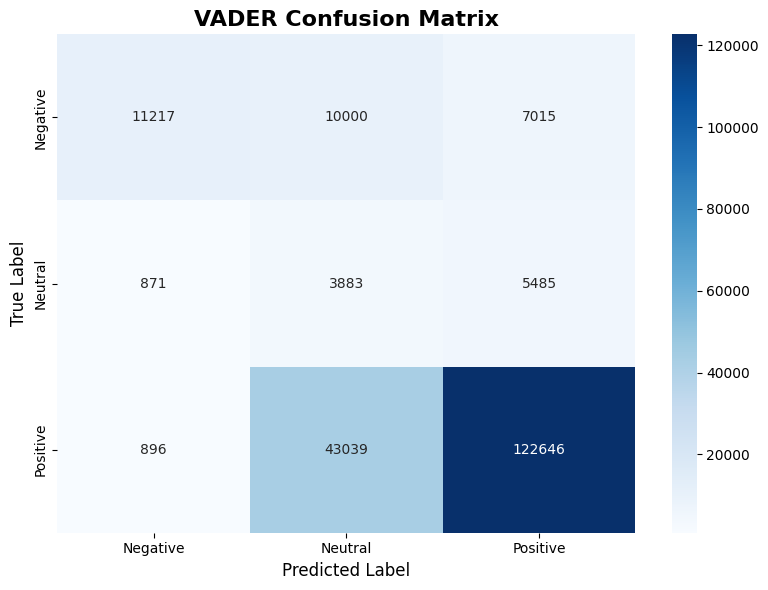


--- 5.3 Evaluating TextBlob Sentiment Model ---
TextBlob Accuracy: 0.6290

TextBlob Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.43      0.58     28232
     Neutral       0.05      0.35      0.09     10239
    Positive       0.90      0.68      0.78    166581

    accuracy                           0.63    205052
   macro avg       0.61      0.49      0.48    205052
weighted avg       0.86      0.63      0.71    205052



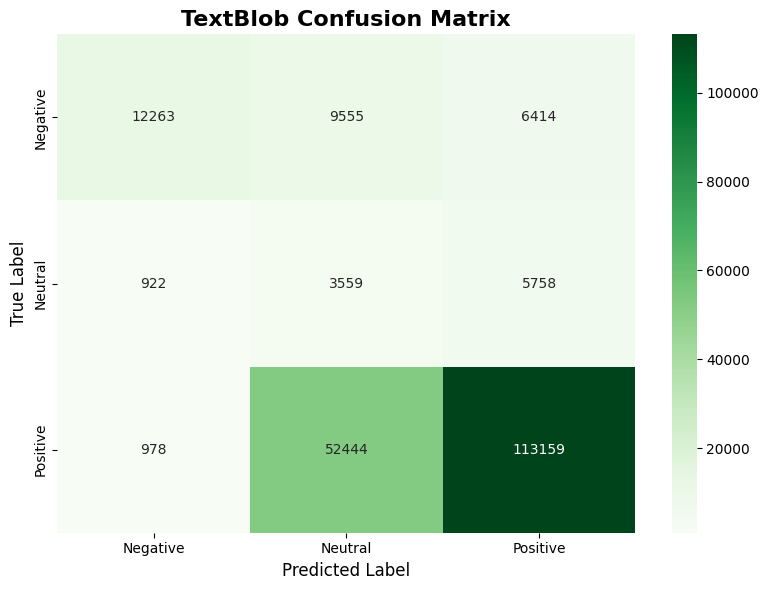


--- Step 5: Model Evaluation and Comparison Complete! ---


In [11]:
# --- Section 5: Model Evaluation and Comparison ---
# Objective: Evaluate the performance of VADER and TextBlob against the original 'Sentiment' labels.

print("Initiating Step 5: Model Evaluation and Comparison...")

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the true sentiment column from your dataset.
true_sentiment_column_name = 'Sentiment' # This matches your 'Dataset-SA.csv'

# Define the sentiment mapping for consistent comparison.
# Ensure your true sentiment labels ('positive', 'negative', 'neutral')
# match the labels used by our sentiment classification functions.
sentiment_mapping = {
    'positive': 'Positive',
    'negative': 'Negative',
    'neutral': 'Neutral'
}

if true_sentiment_column_name not in df.columns:
    print(f"ERROR: The column '{true_sentiment_column_name}' was not found in the DataFrame.")
    print("Please ensure your dataset has a 'Sentiment' column for evaluation.")
else:
    # --- 5.1 Prepare True Labels ---
    # Convert the original 'Sentiment' column to a consistent format
    print("\n--- 5.1 Preparing True Labels ---")
    df['true_sentiment'] = df[true_sentiment_column_name].map(sentiment_mapping)

    # Drop rows where 'true_sentiment' could not be mapped (if any unexpected values existed)
    initial_rows = len(df)
    df.dropna(subset=['true_sentiment'], inplace=True)
    if len(df) < initial_rows:
        print(f"Dropped {initial_rows - len(df)} rows due to unmapped true sentiment values.")
    print(f"True sentiment labels prepared. Remaining rows: {len(df)}")

    # Define target names for classification report (should be consistent order)
    target_names = ['Negative', 'Neutral', 'Positive']


    # --- 5.2 Evaluate VADER Sentiment ---
    print("\n--- 5.2 Evaluating VADER Sentiment Model ---")
    # Filter for reviews where 'vader_sentiment' is not empty (e.g., if original review was empty)
    # And ensure there is a true_sentiment for comparison.
    valid_vader_data = df[(df['vader_sentiment'].notna()) & (df['true_sentiment'].notna())]

    if not valid_vader_data.empty:
        vader_true = valid_vader_data['true_sentiment']
        vader_pred = valid_vader_data['vader_sentiment']

        # Calculate Accuracy
        vader_accuracy = accuracy_score(vader_true, vader_pred)
        print(f"VADER Accuracy: {vader_accuracy:.4f}")

        # Generate Classification Report
        print("\nVADER Classification Report:")
        print(classification_report(vader_true, vader_pred, labels=target_names, zero_division=0)) # zero_division=0 to handle cases with no predicted samples

        # Plot Confusion Matrix
        vader_cm = confusion_matrix(vader_true, vader_pred, labels=target_names)
        plt.figure(figsize=(8, 6))
        sns.heatmap(vader_cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_names, yticklabels=target_names)
        plt.title('VADER Confusion Matrix', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("No valid data to evaluate VADER sentiment.")


    # --- 5.3 Evaluate TextBlob Sentiment ---
    print("\n--- 5.3 Evaluating TextBlob Sentiment Model ---")
    # Filter for reviews where 'textblob_sentiment' is not empty and has a true_sentiment.
    valid_textblob_data = df[(df['textblob_sentiment'].notna()) & (df['true_sentiment'].notna())]

    if not valid_textblob_data.empty:
        textblob_true = valid_textblob_data['true_sentiment']
        textblob_pred = valid_textblob_data['textblob_sentiment']

        # Calculate Accuracy
        textblob_accuracy = accuracy_score(textblob_true, textblob_pred)
        print(f"TextBlob Accuracy: {textblob_accuracy:.4f}")

        # Generate Classification Report
        print("\nTextBlob Classification Report:")
        print(classification_report(textblob_true, textblob_pred, labels=target_names, zero_division=0))

        # Plot Confusion Matrix
        textblob_cm = confusion_matrix(textblob_true, textblob_pred, labels=target_names)
        plt.figure(figsize=(8, 6))
        sns.heatmap(textblob_cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=target_names, yticklabels=target_names)
        plt.title('TextBlob Confusion Matrix', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("No valid data to evaluate TextBlob sentiment.")

print("\n--- Step 5: Model Evaluation and Comparison Complete! ---")

Initiating Step 6: Visualization of Results and Insights...

--- 6.1 Visualizing Distribution of True Sentiment ---


<ipython-input-13-44528917aa94>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='true_sentiment', data=df, order=sentiment_order, palette=sentiment_colors)


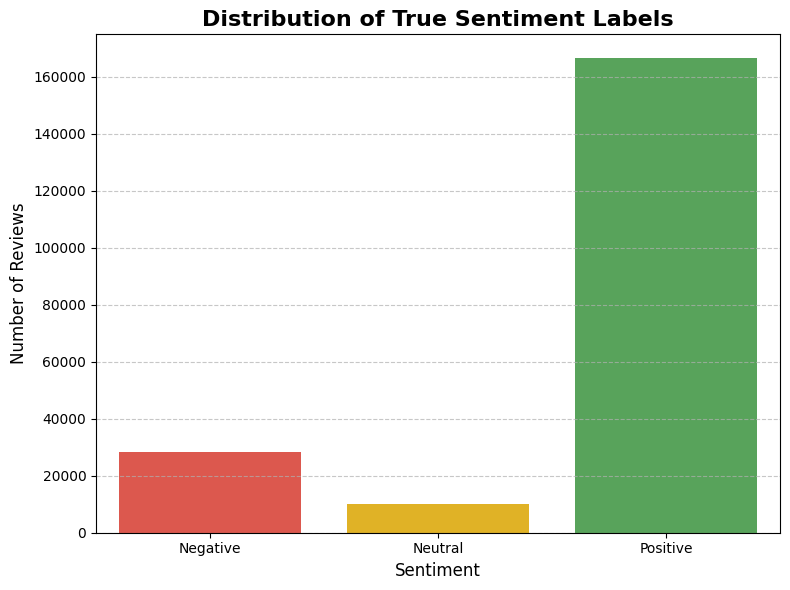


--- 6.2 Visualizing Distribution of VADER Predicted Sentiment ---


<ipython-input-13-44528917aa94>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment', data=df, order=sentiment_order, palette=sentiment_colors)


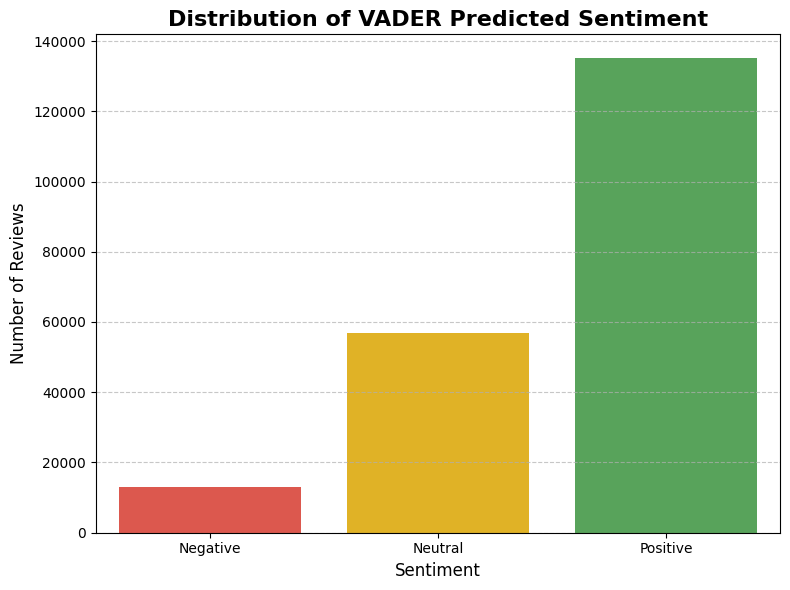


--- 6.3 Visualizing Distribution of TextBlob Predicted Sentiment ---


<ipython-input-13-44528917aa94>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='textblob_sentiment', data=df, order=sentiment_order, palette=sentiment_colors)


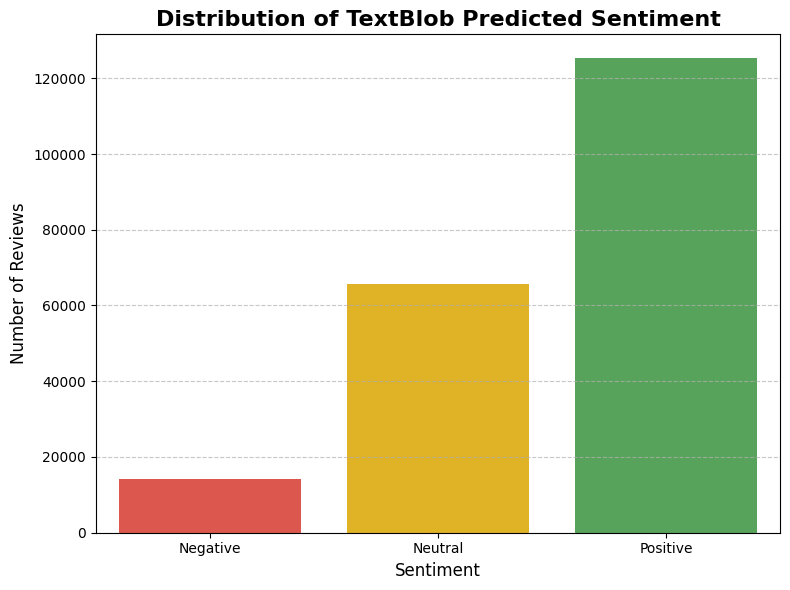


--- 6.4 Comparing True vs. Predicted Sentiments ---


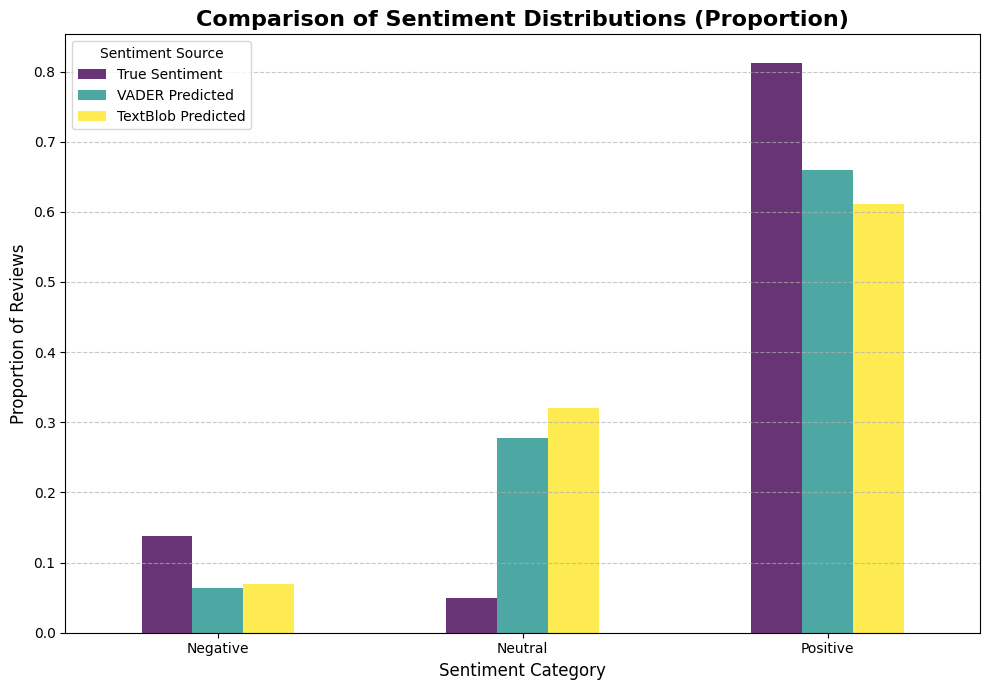


--- 6.5 Visualizing True Sentiment by Product Rating ---


<ipython-input-13-44528917aa94>:86: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


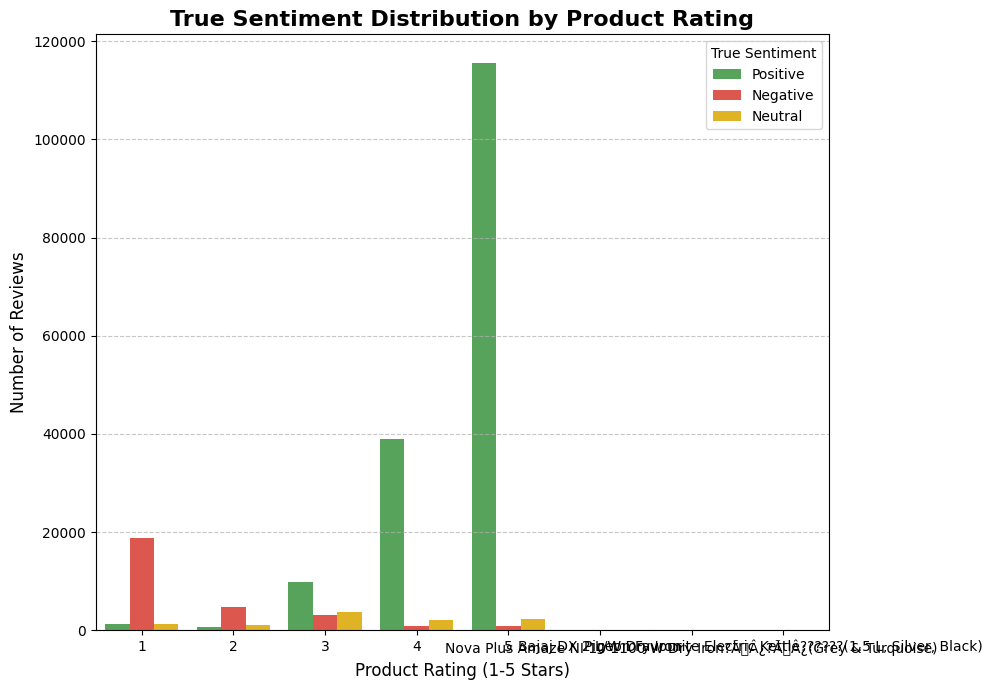


--- 6.6 Visualizing VADER Predicted Sentiment by Product Rating ---


<ipython-input-13-44528917aa94>:101: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


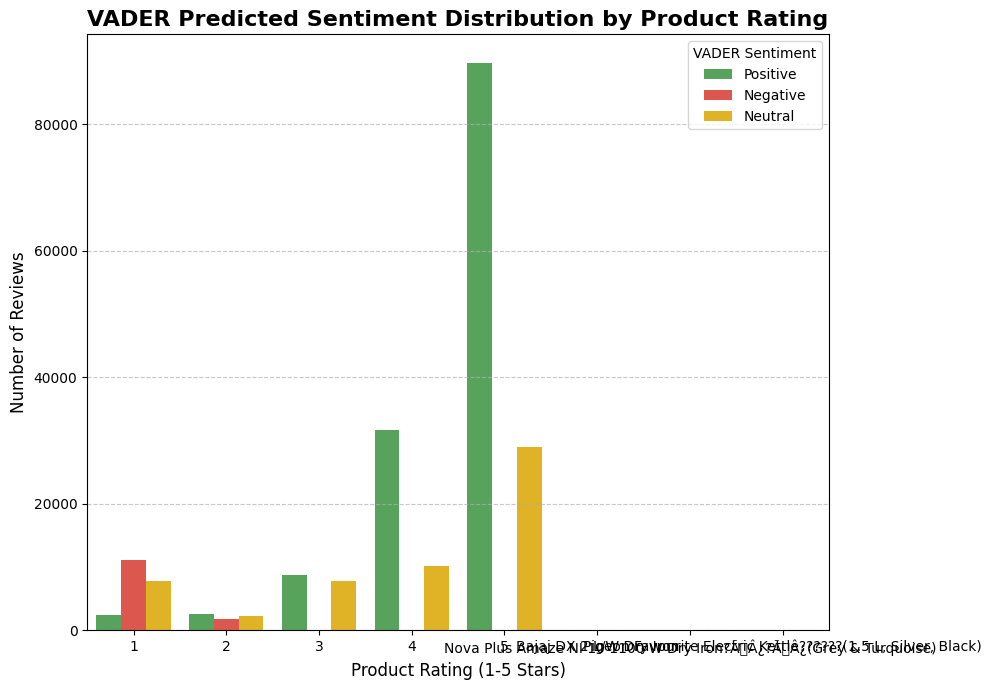


--- 6.7 Visualizing TextBlob Predicted Sentiment by Product Rating ---


<ipython-input-13-44528917aa94>:115: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


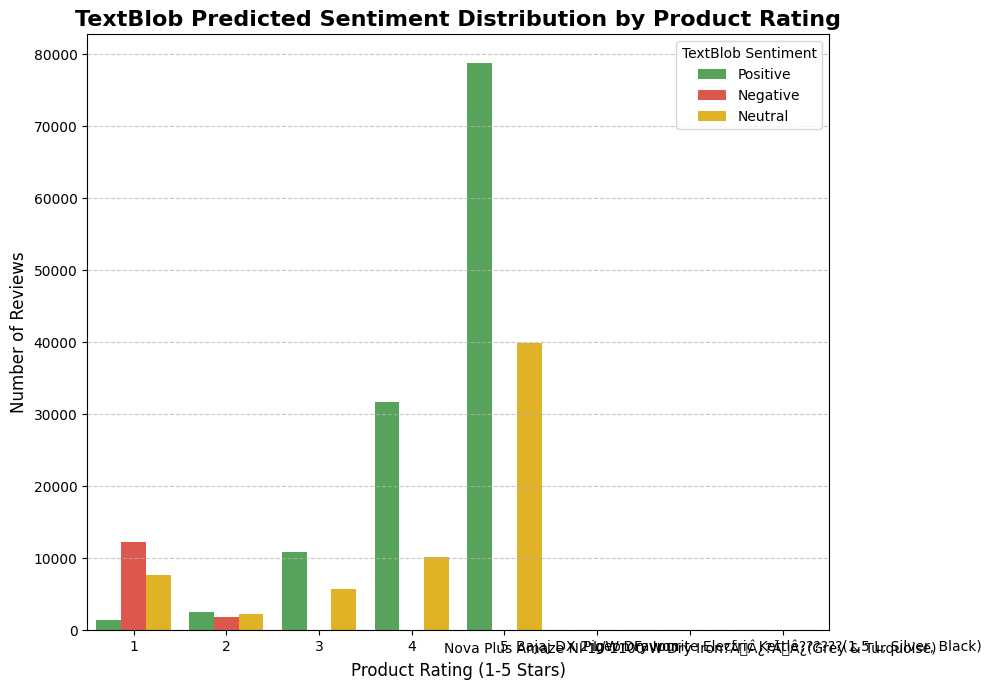


--- Step 6: Visualization of Results and Insights Complete! ---
Visualizations should provide further understanding of sentiment patterns and model behavior.


In [13]:
# --- Section 6: Visualization of Results and Insights ---
# Objective: Create visualizations to better understand sentiment distributions and model agreements.

print("Initiating Step 6: Visualization of Results and Insights...")

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent color palette for sentiment categories
sentiment_colors = {
    'Positive': '#4CAF50',  # Green
    'Neutral': '#FFC107',   # Amber/Yellow
    'Negative': '#F44336'   # Red
}

# Order of sentiment categories for plots
sentiment_order = ['Negative', 'Neutral', 'Positive']


# --- 6.1 Distribution of True Sentiment ---
print("\n--- 6.1 Visualizing Distribution of True Sentiment ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='true_sentiment', data=df, order=sentiment_order, palette=sentiment_colors)
plt.title('Distribution of True Sentiment Labels', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- 6.2 Distribution of VADER Predicted Sentiment ---
print("\n--- 6.2 Visualizing Distribution of VADER Predicted Sentiment ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='vader_sentiment', data=df, order=sentiment_order, palette=sentiment_colors)
plt.title('Distribution of VADER Predicted Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- 6.3 Distribution of TextBlob Predicted Sentiment ---
print("\n--- 6.3 Visualizing Distribution of TextBlob Predicted Sentiment ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='textblob_sentiment', data=df, order=sentiment_order, palette=sentiment_colors)
plt.title('Distribution of TextBlob Predicted Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- 6.4 Comparison of True vs. Predicted Sentiments (Bar Plot) ---
print("\n--- 6.4 Comparing True vs. Predicted Sentiments ---")
sentiment_counts = pd.DataFrame({
    'True Sentiment': df['true_sentiment'].value_counts(normalize=True),
    'VADER Predicted': df['vader_sentiment'].value_counts(normalize=True),
    'TextBlob Predicted': df['textblob_sentiment'].value_counts(normalize=True)
}).loc[sentiment_order] # Ensure consistent order

sentiment_counts.plot(kind='bar', figsize=(10, 7), colormap='viridis', alpha=0.8)
plt.title('Comparison of Sentiment Distributions (Proportion)', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Proportion of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentiment Source')
plt.tight_layout()
plt.show()


# --- 6.5 Sentiment by Rating (True Sentiment) ---
# This shows how the original (human-labeled) sentiment aligns with star ratings.
print("\n--- 6.5 Visualizing True Sentiment by Product Rating ---")
plt.figure(figsize=(10, 7))
sns.countplot(x='Rate', hue='true_sentiment', data=df, palette=sentiment_colors,
              order=sorted(df['Rate'].unique())) # Sort rates numerically
plt.title('True Sentiment Distribution by Product Rating', fontsize=16, fontweight='bold')
plt.xlabel('Product Rating (1-5 Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='True Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- 6.6 Sentiment by Rating (VADER Predicted Sentiment) ---
# This shows how VADER's predicted sentiment aligns with star ratings.
print("\n--- 6.6 Visualizing VADER Predicted Sentiment by Product Rating ---")
plt.figure(figsize=(10, 7))
sns.countplot(x='Rate', hue='vader_sentiment', data=df, palette=sentiment_colors,
              order=sorted(df['Rate'].unique()))
plt.title('VADER Predicted Sentiment Distribution by Product Rating', fontsize=16, fontweight='bold')
plt.xlabel('Product Rating (1-5 Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='VADER Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 6.7 Sentiment by Rating (TextBlob Predicted Sentiment) ---
# This shows how TextBlob's predicted sentiment aligns with star ratings.
print("\n--- 6.7 Visualizing TextBlob Predicted Sentiment by Product Rating ---")
plt.figure(figsize=(10, 7))
sns.countplot(x='Rate', hue='textblob_sentiment', data=df, palette=sentiment_colors,
              order=sorted(df['Rate'].unique()))
plt.title('TextBlob Predicted Sentiment Distribution by Product Rating', fontsize=16, fontweight='bold')
plt.xlabel('Product Rating (1-5 Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='TextBlob Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("\n--- Step 6: Visualization of Results and Insights Complete! ---")
print("Visualizations should provide further understanding of sentiment patterns and model behavior.")

Initiating Step 5: Model Evaluation and Comparison...

--- 5.1 Preparing True Labels ---
True sentiment labels prepared. Remaining rows: 205052

--- 5.2 Evaluating VADER Sentiment Model ---
VADER Accuracy: 0.6718

VADER Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.40      0.54     28232
     Neutral       0.07      0.38      0.12     10239
    Positive       0.91      0.74      0.81    166581

    accuracy                           0.67    205052
   macro avg       0.61      0.50      0.49    205052
weighted avg       0.86      0.67      0.74    205052



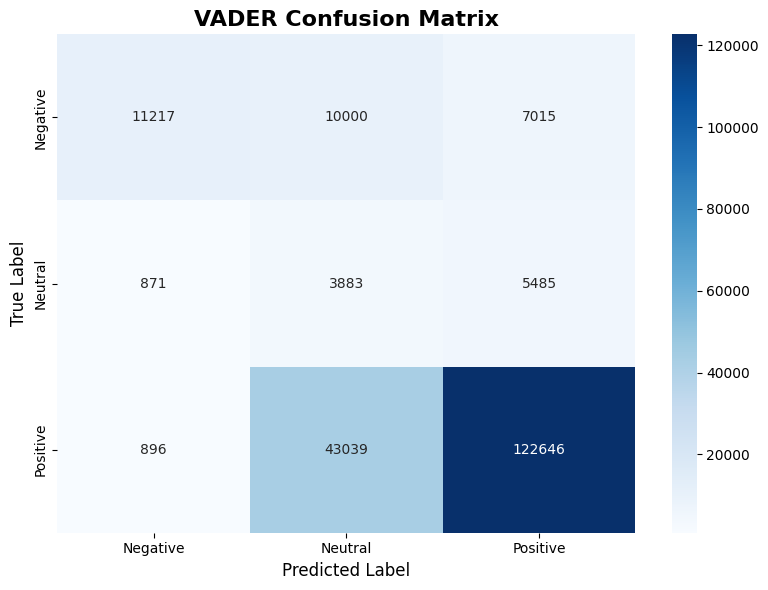


--- 5.3 Evaluating TextBlob Sentiment Model ---
TextBlob Accuracy: 0.6290

TextBlob Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.43      0.58     28232
     Neutral       0.05      0.35      0.09     10239
    Positive       0.90      0.68      0.78    166581

    accuracy                           0.63    205052
   macro avg       0.61      0.49      0.48    205052
weighted avg       0.86      0.63      0.71    205052



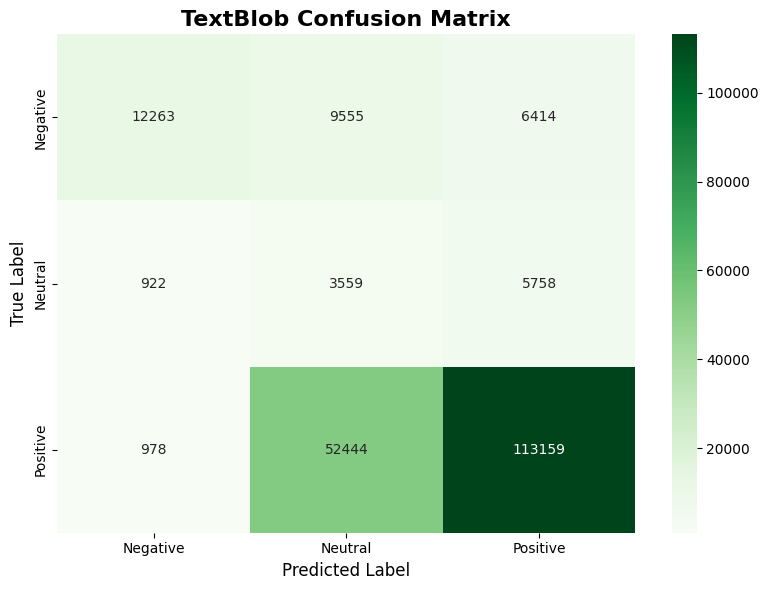


--- Step 5: Model Evaluation and Comparison Complete! ---


In [12]:
# --- Section 5: Model Evaluation and Comparison ---
# Objective: Evaluate the performance of VADER and TextBlob against the original 'Sentiment' labels.

print("Initiating Step 5: Model Evaluation and Comparison...")

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the true sentiment column from your dataset.
true_sentiment_column_name = 'Sentiment' # This matches your 'Dataset-SA.csv'

# Define the sentiment mapping for consistent comparison.
# Ensure your true sentiment labels ('positive', 'negative', 'neutral')
# match the labels used by our sentiment classification functions.
sentiment_mapping = {
    'positive': 'Positive',
    'negative': 'Negative',
    'neutral': 'Neutral'
}

if true_sentiment_column_name not in df.columns:
    print(f"ERROR: The column '{true_sentiment_column_name}' was not found in the DataFrame.")
    print("Please ensure your dataset has a 'Sentiment' column for evaluation.")
else:
    # --- 5.1 Prepare True Labels ---
    # Convert the original 'Sentiment' column to a consistent format
    print("\n--- 5.1 Preparing True Labels ---")
    df['true_sentiment'] = df[true_sentiment_column_name].map(sentiment_mapping)

    # Drop rows where 'true_sentiment' could not be mapped (if any unexpected values existed)
    initial_rows = len(df)
    df.dropna(subset=['true_sentiment'], inplace=True)
    if len(df) < initial_rows:
        print(f"Dropped {initial_rows - len(df)} rows due to unmapped true sentiment values.")
    print(f"True sentiment labels prepared. Remaining rows: {len(df)}")

    # Define target names for classification report (should be consistent order)
    target_names = ['Negative', 'Neutral', 'Positive']


    # --- 5.2 Evaluate VADER Sentiment ---
    print("\n--- 5.2 Evaluating VADER Sentiment Model ---")
    # Filter for reviews where 'vader_sentiment' is not empty (e.g., if original review was empty)
    # And ensure there is a true_sentiment for comparison.
    valid_vader_data = df[(df['vader_sentiment'].notna()) & (df['true_sentiment'].notna())]

    if not valid_vader_data.empty:
        vader_true = valid_vader_data['true_sentiment']
        vader_pred = valid_vader_data['vader_sentiment']

        # Calculate Accuracy
        vader_accuracy = accuracy_score(vader_true, vader_pred)
        print(f"VADER Accuracy: {vader_accuracy:.4f}")

        # Generate Classification Report
        print("\nVADER Classification Report:")
        print(classification_report(vader_true, vader_pred, labels=target_names, zero_division=0)) # zero_division=0 to handle cases with no predicted samples

        # Plot Confusion Matrix
        vader_cm = confusion_matrix(vader_true, vader_pred, labels=target_names)
        plt.figure(figsize=(8, 6))
        sns.heatmap(vader_cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_names, yticklabels=target_names)
        plt.title('VADER Confusion Matrix', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("No valid data to evaluate VADER sentiment.")


    # --- 5.3 Evaluate TextBlob Sentiment ---
    print("\n--- 5.3 Evaluating TextBlob Sentiment Model ---")
    # Filter for reviews where 'textblob_sentiment' is not empty and has a true_sentiment.
    valid_textblob_data = df[(df['textblob_sentiment'].notna()) & (df['true_sentiment'].notna())]

    if not valid_textblob_data.empty:
        textblob_true = valid_textblob_data['true_sentiment']
        textblob_pred = valid_textblob_data['textblob_sentiment']

        # Calculate Accuracy
        textblob_accuracy = accuracy_score(textblob_true, textblob_pred)
        print(f"TextBlob Accuracy: {textblob_accuracy:.4f}")

        # Generate Classification Report
        print("\nTextBlob Classification Report:")
        print(classification_report(textblob_true, textblob_pred, labels=target_names, zero_division=0))

        # Plot Confusion Matrix
        textblob_cm = confusion_matrix(textblob_true, textblob_pred, labels=target_names)
        plt.figure(figsize=(8, 6))
        sns.heatmap(textblob_cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=target_names, yticklabels=target_names)
        plt.title('TextBlob Confusion Matrix', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("No valid data to evaluate TextBlob sentiment.")

print("\n--- Step 5: Model Evaluation and Comparison Complete! ---")